In [93]:
%matplotlib notebook
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
sys.path.append('/root/cAAE')

import torch.nn as nn
import torch
from torch.autograd import Variable
from torch.utils.tensorboard import SummaryWriter

from model.tools.config import Config, read_conf
from model.train import train
from model.test import test, test_show
config = read_conf(f'/root/cAAE/config/{os.environ["CONFIG_NAME"]}.json')

In [107]:
from model.generator import generator, net
config.train.n_epochs = 2
dataset = generator(config, train_flg=True)
config.transforms += {'img_shape': dataset.get_img_shape()}
model = BiGAN(config, train_flg=False)

[Cuda: True]


In [108]:
model.train(dataset)



Epoch:   0%|          | 0/2 [00:00<?, ?it/s]


Bath:   0%|          | 0/21 [00:00<?, ?it/s]


Bath:   5%|▍         | 1/21 [00:03<01:13,  3.66s/it]


Bath:  10%|▉         | 2/21 [00:07<01:10,  3.70s/it]


Bath:  14%|█▍        | 3/21 [00:11<01:06,  3.69s/it]


Bath:  19%|█▉        | 4/21 [00:14<01:02,  3.69s/it]


Bath:  24%|██▍       | 5/21 [00:18<00:59,  3.69s/it]


Bath:  29%|██▊       | 6/21 [00:22<00:55,  3.69s/it]


Bath:  33%|███▎      | 7/21 [00:25<00:51,  3.68s/it]


Bath:  38%|███▊      | 8/21 [00:29<00:47,  3.68s/it]


Bath:  43%|████▎     | 9/21 [00:33<00:44,  3.71s/it]


Bath:  48%|████▊     | 10/21 [00:36<00:40,  3.70s/it]


Bath:  52%|█████▏    | 11/21 [00:40<00:37,  3.75s/it]


Bath:  57%|█████▋    | 12/21 [00:44<00:34,  3.78s/it]


Bath:  62%|██████▏   | 13/21 [00:48<00:29,  3.74s/it]


Bath:  67%|██████▋   | 14/21 [00:52<00:26,  3.73s/it]


Bath:  71%|███████▏  | 15/21 [00:55<00:22,  3.71s/it]


Bath:  76%|███████▌  | 16/21 [00:59<00:18,  3.72s/it]


Bath:  81%|██████

In [4]:
save_path = '/root/weights'
config.train.max_batch = 42
config.train.n_epochs = 2
config.struct.name = 'BiGAN'
train(config, save_path)



Epoch:   0%|          | 0/2 [00:00<?, ?it/s]


Bath:   0%|          | 0/21 [00:00<?, ?it/s]

[Cuda: True]





Bath:   5%|▍         | 1/21 [00:04<01:21,  4.08s/it]


Bath:  10%|▉         | 2/21 [00:08<01:17,  4.08s/it]


Bath:  14%|█▍        | 3/21 [00:12<01:13,  4.07s/it]


Bath:  19%|█▉        | 4/21 [00:16<01:09,  4.08s/it]


Bath:  24%|██▍       | 5/21 [00:20<01:05,  4.08s/it]


Bath:  29%|██▊       | 6/21 [00:24<01:00,  4.03s/it]


Bath:  33%|███▎      | 7/21 [00:28<00:56,  4.06s/it]


Bath:  38%|███▊      | 8/21 [00:32<00:52,  4.04s/it]


Bath:  43%|████▎     | 9/21 [00:36<00:48,  4.07s/it]


Bath:  48%|████▊     | 10/21 [00:40<00:44,  4.05s/it]


Bath:  52%|█████▏    | 11/21 [00:44<00:40,  4.07s/it]


Bath:  57%|█████▋    | 12/21 [00:48<00:36,  4.09s/it]


Bath:  62%|██████▏   | 13/21 [00:52<00:32,  4.09s/it]


Bath:  67%|██████▋   | 14/21 [00:57<00:29,  4.25s/it]


Bath:  71%|███████▏  | 15/21 [01:01<00:25,  4.20s/it]


Bath:  76%|███████▌  | 16/21 [01:05<00:20,  4.18s/it]


Bath:  81%|████████  | 17/21 [01:09<00:16,  4.12s/it]


Bath:  86%|████████▌ | 18/21 [01:14<00:12,  4.31s/it]


In [4]:
%%bash
ls /root/weights/

decoder_AAE_0
decoder_AAE_10
decoder_AAE_20
decoder_AAE_30
decoder_AAE_40
decoder_AAE_50
decoder_AAE_60
decoder_AAE_70
decoder_AAE_80
decoder_AAE_90
decoder_cAAE
decoder_cAAE_0
decoder_cAAE_10
decoder_cAAE_100
decoder_cAAE_110
decoder_cAAE_120
decoder_cAAE_130
decoder_cAAE_140
decoder_cAAE_20
decoder_cAAE_30
decoder_cAAE_40
decoder_cAAE_50
decoder_cAAE_60
decoder_cAAE_70
decoder_cAAE_80
decoder_cAAE_90
discriminator_AAE_0
discriminator_AAE_10
discriminator_AAE_20
discriminator_AAE_30
discriminator_AAE_40
discriminator_AAE_50
discriminator_AAE_60
discriminator_AAE_70
discriminator_AAE_80
discriminator_AAE_90
discriminator_cAAE
discriminator_cAAE_0
discriminator_cAAE_10
discriminator_cAAE_100
discriminator_cAAE_110
discriminator_cAAE_120
discriminator_cAAE_130
discriminator_cAAE_140
discriminator_cAAE_20
discriminator_cAAE_30
discriminator_cAAE_40
discriminator_cAAE_50
discriminator_cAAE_60
discriminator_cAAE_70
discriminator_cAAE_80
discriminator_cAAE_90
encoder_AAE_0
encoder_AAE_10
enc

In [2]:
load_path = '/root/weights'
config.struct.name = 'AAE'
test(config, load_path)

[Cuda: True]


Testing:   3%|▎         | 1/35 [00:20<11:38, 20.56s/it]

KeyboardInterrupt: 

[Cuda: True]


<IPython.core.display.Javascript object>


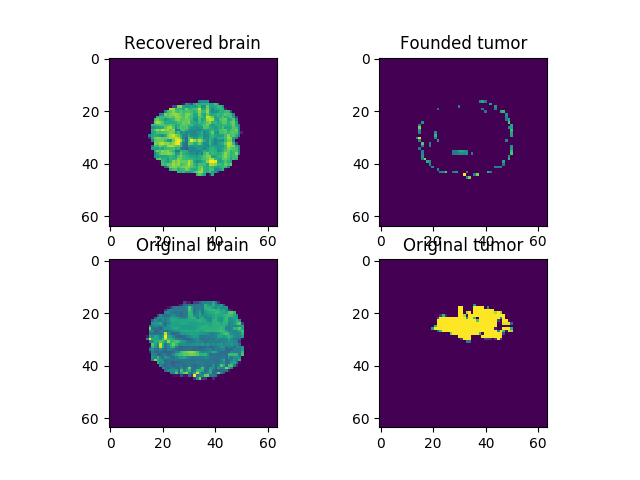

In [3]:
test_show(config, load_path, idx=10)

In [ ]:
 test_show(self, dataset, acc=0.3, idx=None, show_flg=False):
        test_person = dataset.get_person(idx) if idx else dataset.get_random()
        recovered_brain, restore_tumor = self.recover(test_person, dataset.transform, acc)
        fig = self.get_graph(test_person, dataset.transform, recovered_brain, restore_tumor)

In [5]:
from model.generator import generator, net
dataset = generator(config, train_flg=False)
config.transforms += {'img_shape': dataset.get_img_shape()}
model = net[config.struct.name](config, train_flg=False)
model.load(load_path)
# model.test_show(dataset, acc, idx=idx)

[Cuda: True]


In [13]:
idx=11
acc=0.3
test_person = dataset.get_person(idx)
recovered_brain, restore_tumor = model.recover(test_person, dataset.transform, acc)

In [14]:
person = test_person
transform = dataset.transform

<IPython.core.display.Javascript object>


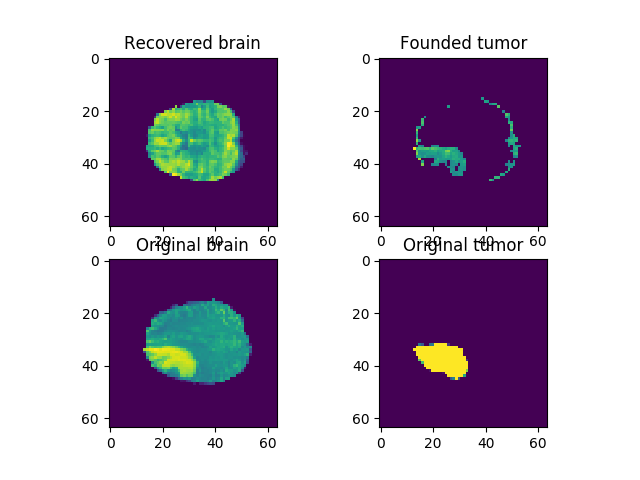

Text(0.5, 1.0, 'Original tumor')

In [18]:
n = int(recovered_brain.shape[0] * 2 / 3)
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(recovered_brain[n, :, :])
axs[0, 0].set_title('Recovered brain')
axs[0, 1].imshow(restore_tumor[n, :, :])
axs[0, 1].set_title('Founded tumor')
axs[1, 0].imshow(person(transform)[n, :, :])
axs[1, 0].set_title('Original brain')
axs[1, 1].imshow(person.get_tumor(transform)[n, :, :])
axs[1, 1].set_title('Original tumor')
# fig.savefig(os.path.join(self.output, f'random_tumor_{self.name}.png'))

<IPython.core.display.Javascript object>


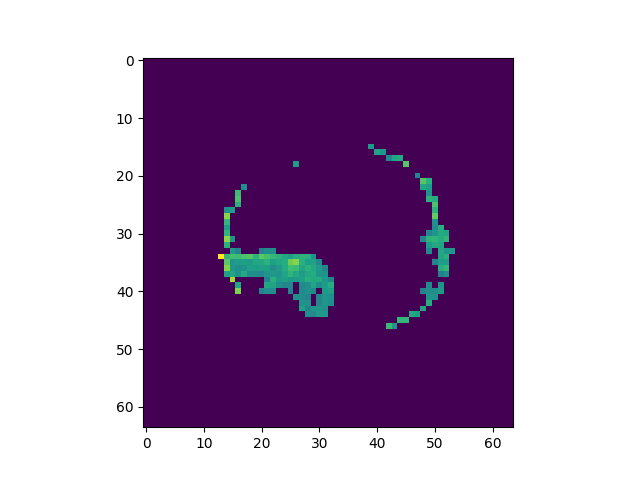

In [17]:
plt.imshow(restore_tumor[n, :, :])